Detecção de valores anômalos
============================



In [55]:
# importando as bibliotecas e módulos necessários
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [56]:
df = sns.load_dataset('penguins')
dfcopia = df.copy()
dfcopia = dfcopia.dropna(axis=0)
especies = dfcopia['species'].unique()
print(especies)

dfcopia['specie numerica'] = 0

i = 0
for pinguin in dfcopia['species']:
    #print(pinguin)
    if pinguin == 'Adelie':
        dfcopia['specie numerica'].iloc[i] = 1
        i += 1
    elif pinguin == 'Chinstrap':
        dfcopia['specie numerica'].iloc[i] = 2
        i += 1
    elif pinguin == 'Gentoo':
        dfcopia['specie numerica'].iloc[i] = 3
        i += 1
    #print(dfcopia['species'].iloc[i-1],dfcopia['specie numerica'].iloc[i-1])

features_numericos = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df_numericos = dfcopia[features_numericos]

['Adelie' 'Chinstrap' 'Gentoo']


c:\venv\ilumpy\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [57]:
sc = StandardScaler()
sc.fit(df_numericos)
X_norm = sc.transform(df_numericos)

In [58]:
FEATURES = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
TARGET = ["specie numerica"]

In [59]:
# normalizando o dataframe por outro método:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #Definindo o normalizador
X_norm = scaler.fit_transform(dfcopia[FEATURES].values) #Normalizando

Normalizamos os dados a fim de realizarmos o PCA.

In [60]:
df_norm = pd.DataFrame(X_norm,columns = FEATURES) #Criando o DataFrame a partir com dados normalizados, que é um array de numpy
df_norm = pd.concat([df_norm,pd.Series(dfcopia['specie numerica']).reset_index(drop=True)],axis=1) #Concatenando a coluna 'specie numerica' ao DataFrame

In [61]:
import numpy as np

X = df_norm[FEATURES] #Definindo o X como as features
y = df_norm['specie numerica']  #Definindo o y como o target

In [62]:
import numpy as np

SEMENTE_ALEATORIA = 6144
N_EXEMPLOS = 300
N_FEATURES = 3
FRACAO_OUTLIERS = 0.10

n_outliers = int(FRACAO_OUTLIERS * N_EXEMPLOS)
n_inliers = N_EXEMPLOS - n_outliers

rng = np.random.RandomState(SEMENTE_ALEATORIA)

In [63]:
data= df_norm
data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,specie numerica
0,0.254545,0.666667,0.152542,1
1,0.269091,0.511905,0.237288,1
2,0.298182,0.583333,0.389831,1
3,0.167273,0.738095,0.355932,1
4,0.261818,0.892857,0.305085,1


In [64]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1]

In [76]:
# plotando o a classificação do algoritmo Local Outlier Factor (LOF):

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

clf = LocalOutlierFactor(n_neighbors=10)

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

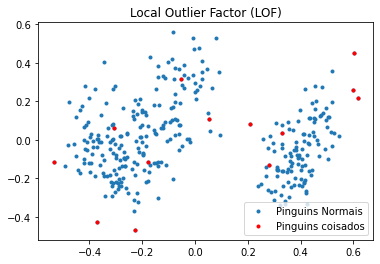

o número de outliers detectados para 10 vizinhos foi igual a: 13


In [77]:
# para 10 n vizinhos:

lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Pinguins Normais", marker = '.')
plt.scatter(values[:,0],values[:,1], color='r', label="Pinguins coisados", marker = '.')
plt.legend(loc="lower right")
plt.show()

print("o número de outliers detectados para 10 vizinhos foi igual a: " + str(len(values[:,0])))

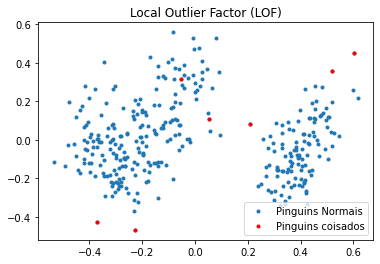

o número de outliers detectados para 20 vizinhos foi igual a: 7


In [78]:
# para 20 n vizinhos:

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

clf = LocalOutlierFactor(n_neighbors=20)

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Pinguins Normais", marker = '.')
plt.scatter(values[:,0],values[:,1], color='r', label="Pinguins coisados", marker = '.')
plt.legend(loc="lower right")
plt.show()

print("o número de outliers detectados para 20 vizinhos foi igual a: " + str(len(values[:,0])))

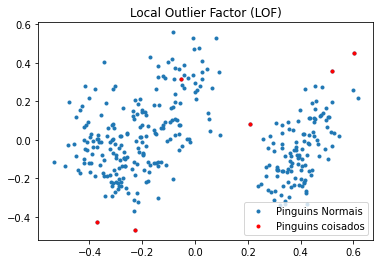

o número de outliers detectados para 30 vizinhos foi igual a: 6


In [79]:
# para 30 n vizinhos:

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

clf = LocalOutlierFactor(n_neighbors=30)

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Pinguins Normais", marker = '.')
plt.scatter(values[:,0],values[:,1], color='r', label="Pinguins coisados", marker = '.')
plt.legend(loc="lower right")
plt.show()

print("o número de outliers detectados para 30 vizinhos foi igual a: " + str(len(values[:,0])))

Pode-se ver acima que o número de vizinhos analisado afeta diretamente o número de dados classificados como outliers pelo algoritmo, assim como quais pontos são esses.

Vê-se que o número total de outliers diminui conforme mais vizinhos são analizados. Para checar se isso continua ocorrendo em diferentes situações, podemos realizar agora o teste com um número ainda menor de vizinhos, como 4 - esperando, assim, um número maior de outliers:

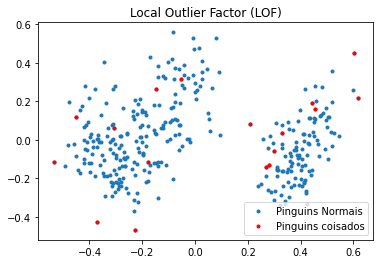

o número de outliers detectados para 4 vizinhos foi igual a: 17


In [81]:
# para 4 n vizinhos:

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

clf = LocalOutlierFactor(n_neighbors=4)

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Pinguins Normais", marker = '.')
plt.scatter(values[:,0],values[:,1], color='r', label="Pinguins coisados", marker = '.')
plt.legend(loc="lower right")
plt.show()

print("o número de outliers detectados para 4 vizinhos foi igual a: " + str(len(values[:,0])))

Como esperado, o número de outliers aumenta quando o número de vizinhos levados em conta diminui. Isso é natural, afinal o algoritmo, por ter menos distâncias para comparar, admite qualquer ponto levemente mais distante como mais um outlier.